In [128]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 7]

In [68]:
# Import data and drop some bad cases
proposed_generators = pd.read_csv('../Tax Equity Code/Clean Data/proposed_gen_master_list.csv')
proposed_generators = proposed_generators.drop(columns='Unnamed: 0')
proposed_generators = proposed_generators[~proposed_generators.utility_id.str.contains('NOTE', na=False)]

/Users/rachelanderson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,8,32,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
# select some columns to make df viewable
good_cols = ['year', 'state',
             'utility_id', 'utility_name',
             'plant_name', 'plant_code', 'plant_county', 'generator_id', 
             'ownership', 'sector_name', 'sector_val',
             'previously_canceled', 
             'scheduled_start_month', 'scheduled_start_year',
             'curr_scheduled_month', 'curr_scheduled_year', 
             'prime_mover','energy_source',
             'nameplate_cap', 'winter_cap_eia']

In [80]:
# These generators only have estimated winter cap by the EIA, or no nameplate cap at all so i will drop them for now
proposed_generators = proposed_generators[~proposed_generators['nameplate_cap'].isna()]

In [91]:
proposed_generators['nameplate_cap'] = proposed_generators['nameplate_cap'].str.replace(',','')
proposed_generators['nameplate_cap'] = pd.to_numeric(proposed_generators['nameplate_cap'])

In [136]:
temp_df = proposed_generators.groupby(['prime_mover','year']).nameplate_cap.sum().unstack(level=0)
temp_df[temp_df.isna()] = 0

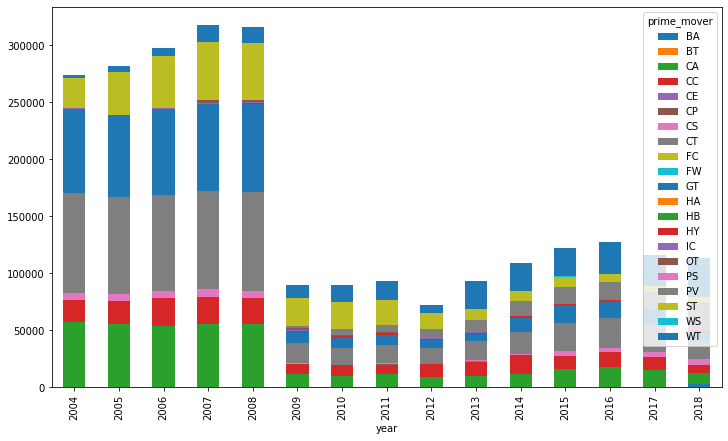

In [137]:
temp_df.plot(kind='bar', stacked=True)

In [ ]:
prime_mover_codes = {}
# ST	Steam Turbine, including nuclear, geothermal and solar steam  (does not include combined cycle) 
# GT	Combustion (Gas) Turbine (includes jet engine design)
# IC	Internal Combustion Engine (diesel, piston)  
# CA	Combined Cycle Steam Part 
# CT	Combined Cycle Combustion Turbine Part 
# CS	Combined Cycle Single Shaft (combustion turbine and steam turbine share a single generator)
# CC	Combined Cycle - Total Unit
# HY	Hydraulic Turbine (includes turbines associated with delivery of water by pipeline)
# PS	Hydraulic Turbine – Reversible (pumped storage)
# BT	Turbines used in a binary cycle such as geothermal
# PV	Photovoltaic
# WT	Wind Turbine
# CE	Compressed Air Energy Storage
# FC	Fuel Cell 
# OT	Other
# NA	Unknown at this time (use only for plants/generators in planning stage)